# Bootstrap and Resample Methods

### Data Sciene 350

### Stephen Elston

## Introduction

Bootstrap and resampling are widely applicable statistical methods which relax many of the assumptions of clasical statistics. Resampling methods draw heavily on the CLT. Specifically resampling methods:

- Allow computation of statistics from limited data
- Compute statistic from multiple subsamples of dataset
- Minimal distribution assumptions
- Computationally intensive

Commonly used resampling methods include:

- Randomization or Permutation methods: e.g. Fisher's exact test
- Bootstrap: resample with equivalent size and replacement
- Jackknife: leave one out resampling
- Cross validation: resample into folds without replacement


## Pitfalls

But, there is no magic involved. When using resampling methods always keep in mind the several pitfalls:
- If sample is biased, resample statistic is biased
- Sample variance and Cis are no better than sample allows



## History

### Randomization and permutation methods

Randomization and permutation methods were pioneered by Fisher as early as 1911. Fisher fully developed the theory in his 1935 book. Scalability of these methods remain limited, even with modern computers. 

### Cross-validaton

Cross-validation was origianlly proposed by Kurtz in 1948. Mosier extended the method to double cross validation in 1951. The modern method of nested or multicoross-validation were introduced by Krus and Fuller in 1982. Today, cross-validation is widely used in the testing of machine learning models. 

### Jack knife methods

Maurice Quenouille originally suggested this method in 1949. The jack knife was fully developed
by John W. Tukey, who gave the method its name, in 1958. Tukey saw that method as a simple tool useful for many purposes like a pocket knife. 


### Bootstrap 

The bootstrap method was first suggested by Efron and Hinkley in 1978 and further developed by Efron in 1979. A full treatment was provided in Efron's 1980 book. 

![](img/Efron1980.jpg)

![](img/2014_Efron-outdoors.jpg)

With increased computing power, use of bootstrap methods continues to expand. 

## Overview of the bootstrap

The bootstrap method 

- Re-compute statistic many times with sample 
- Randomly sample (e.g. Bernoulli sample) data with replacement
- Subsamples have the same size as original sample
- Works with any statistic … in principle

For example, you can compute the bootstrap mean as:

$$Meanboot = \frac{\Sigma_i mean(sample_i)}{nsample}\\
where,\ for\ example\ with\ 10\ samples,\\
sample_i = X_1 + X_2 + X_3 + X_4 + X_5 + X_6 + X_7 + X_8 + X_1 + X_5$$

### Bootstrap example

Let's try a fist example. You will bootstrap the means of the hights of different populations from Galton's height data. This is an example of a parametric bootstrap estimate. Parametric because our model has a parameter, the mean, we are trying to estimate. 

As a first step, the code in the cell below divides the data set by male and female adult childern, and then plots the distributions with the means of the two populations. Run this code and examine the results>

Warning message:
"package 'HistData' was built under R version 3.3.2"Warning message:
"package 'resample' was built under R version 3.3.2"Warning message:
"package 'simpleboot' was built under R version 3.3.2"Loading required package: boot
Simple Bootstrap Routines (1.1-3 2008-04-30)


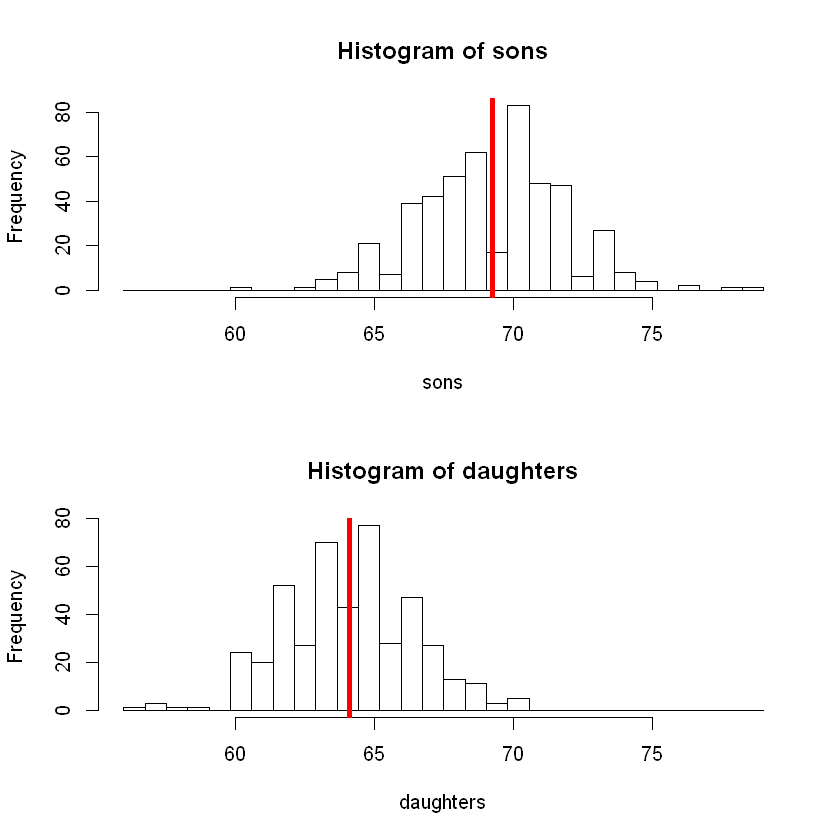

In [2]:
library(HistData)
library(resample)
library(simpleboot)

male = GaltonFamilies[GaltonFamilies$gender == 'male',]
female = GaltonFamilies[GaltonFamilies$gender == 'female',]

plot.dists <- function(a, b, cols = c('pop_A', 'pop_B'), nbins = 20){
  dat = c(a,b)
  maxs = max(dat, na.rm = TRUE)
  mins = min(dat, na.rm = TRUE)
  breaks = seq(maxs, mins, length.out = (nbins + 1))
  par(mfrow = c(2, 1))
  hist(a, breaks = breaks, main = paste('Histogram of', cols[1]), xlab = cols[1])
  abline(v = mean(a), lwd = 4, col = 'red')
  hist(b, breaks = breaks, main = paste('Histogram of', cols[2]), xlab = cols[2])
  abline(v = mean(b), lwd = 4, col = 'red')
  par(mfrow = c(1, 1))
}

plot.dists(male$childHeight, female$childHeight, cols = c('sons', 'daughters'), nbins = 30)

You can see that the distributions of the heights of the sons and daughters overlap. But, are the means significantly different.

### Boot strap the means

The code in the cell below uses the `one.boot` function from the R `simpleboot` package to compute the bootstrap distribution of the means of the heights of the sons and daughters. The rest of the code plots the results of the two bootstrap estimates, including the 95% confidence interval for the estimates. Run this code and examine the results. 

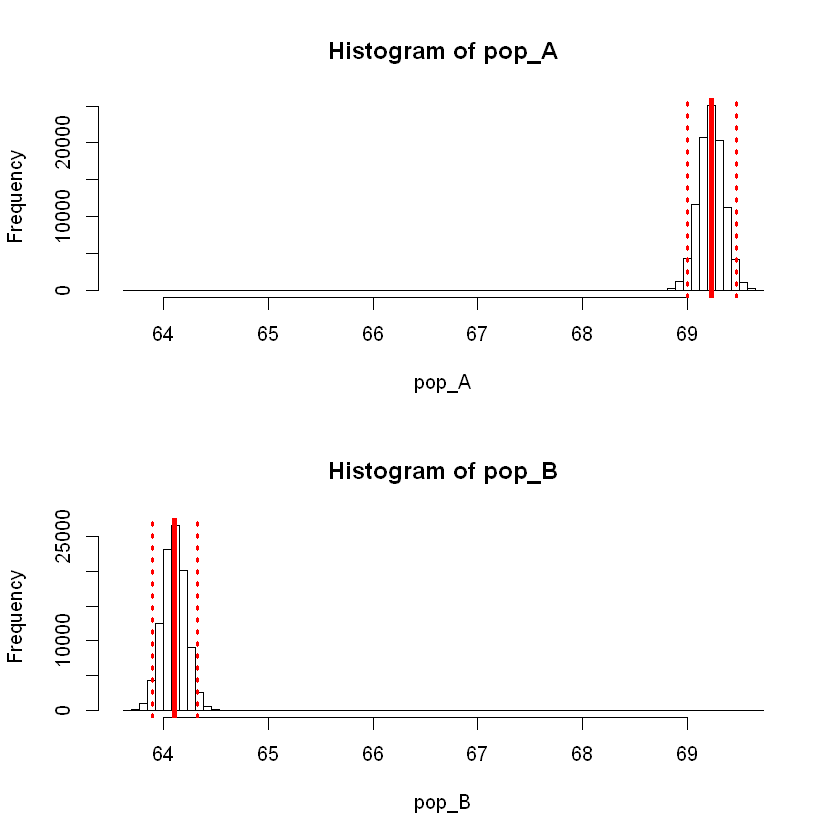

In [3]:
plot.hist <- function(a, maxs, mins, cols = 'difference of means', nbins = 80, p = 0.05) {
  breaks = seq(maxs, mins, length.out = (nbins + 1))
  hist(a, breaks = breaks, main = paste('Histogram of', cols), xlab = cols)
  abline(v = mean(a), lwd = 4, col = 'red')
  abline(v = 0, lwd = 4, col = 'blue')
  abline(v = quantile(a, probs = p/2), lty = 3, col = 'red', lwd = 3)  
  abline(v = quantile(a, probs = (1 - p/2)), lty = 3, col = 'red', lwd = 3)
}

plot.t <- function(a, b, cols = c('pop_A', 'pop_B'), nbins = 80, p = 0.05){
  maxs = max(c(max(a), max(b)))
  mins = min(c(min(a), min(b)))
  par(mfrow = c(2, 1))
  plot.hist(a, maxs, mins, cols = cols[1])
  plot.hist(b, maxs, mins, cols = cols[2])
  par(mfrow = c(1, 1))
}

## Bootstrap the mean of the sons and of daughters
mean.boot.male = one.boot(male$childHeight, mean, R = 100000)
mean.boot.female = one.boot(female$childHeight, mean, R = 100000)
plot.t(mean.boot.male$t, mean.boot.female$t, nbins = 80)

The distribution of the bootstrap means do not overlap at all. Evidently, the difference is significant. 

**Your turn:** Compute and plot the bootstrap distribution of the mean of the hights of the fathers. Compare this estimate to the bootstrap estimate of the mean of the heights of the sons. Are these means significantly different? Hint; use the `one.boot` function followed by the `plot.t` function. 

### Bootstrap difference in means

In the previous example you computed and compared two bootstrap distributions of the means from the height data. It is actually quite easy to bootstrap a statistic such as the difference in means. 

The code in the cell below uses the `two.boot` function to compute the bootstrap difference in means of two populations, sons and daughters. Run the code in this cell and examine the plotted results.

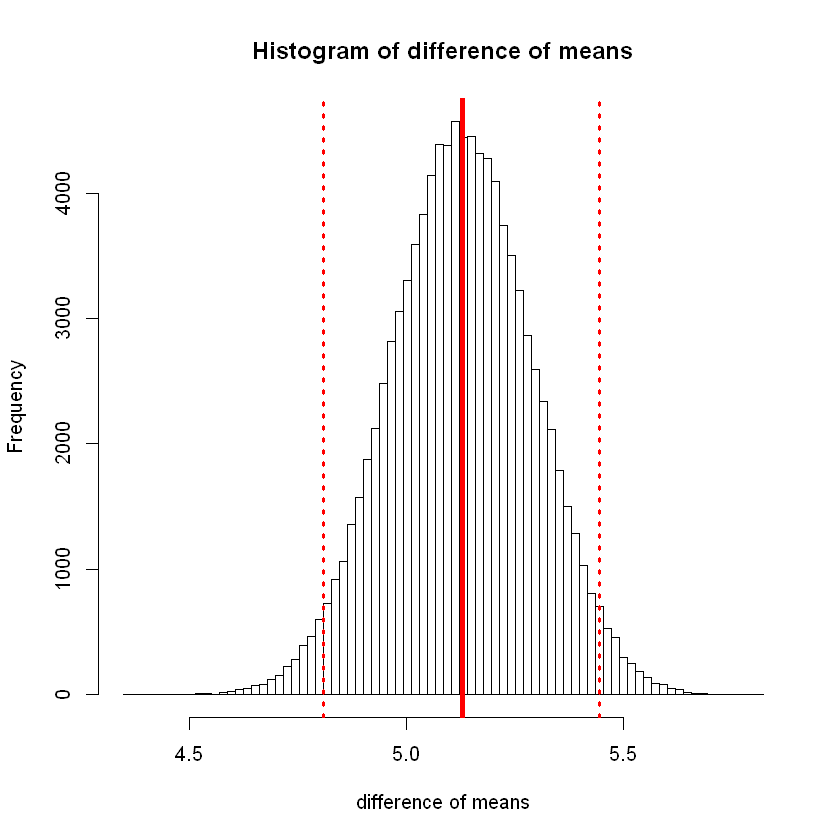

In [4]:
## Bootstrap the difference in means of sons and daughters
plot.diff <- function(a, cols = 'difference of means', nbins = 80, p = 0.05){
  maxs = max(a)
  mins = min(a)
  plot.hist(a, maxs, mins, cols = cols[1])
}

two.boot.mean = two.boot(male$childHeight, female$childHeight, mean, R = 100000)
plot.diff(two.boot.mean$t)

The distribution of the difference in means is far from zero. As before, we can infer that the means of the two populations are significantly different. 

But, is the distribution of the difference in means Normal as implied by the CLT. Run the code in the cell below to create a Q-Q Normal plot of the bootstrap distribution of the difference in means and examine the results. 

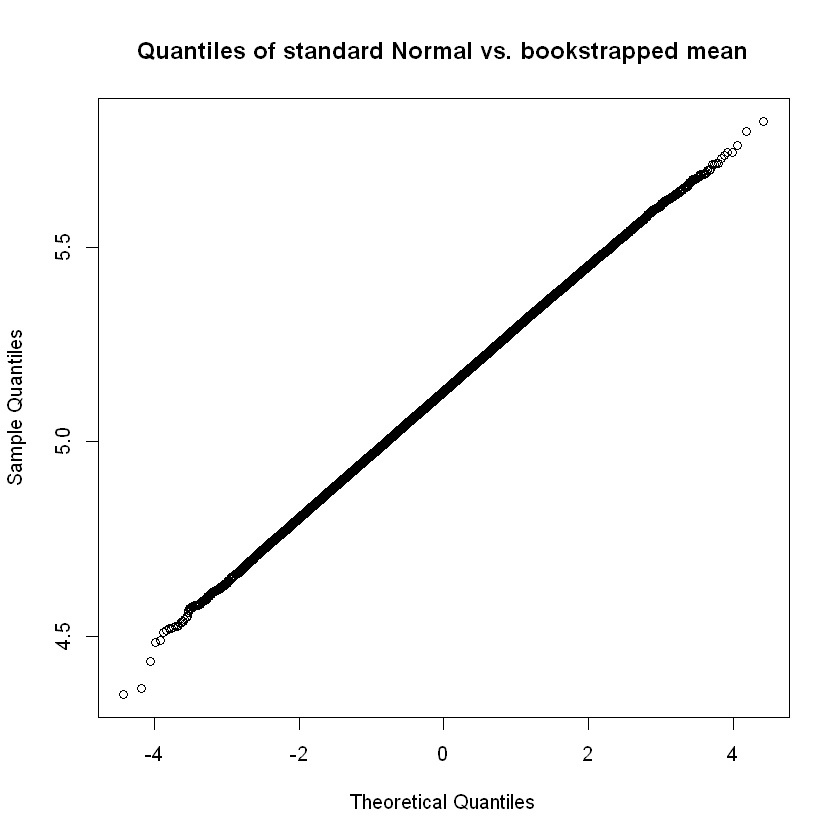

In [5]:
## Is the bootstrapped distribution Normal?
qqnorm(two.boot.mean$t, main = 'Quantiles of standard Normal vs. bookstrapped mean')


The points on the Q-Q Normal plot are nearly on a strait line. Apparently, the bootstrap distribution of the difference in means does conform to the CLT.

**Your Turn:** In the cell below, create and run the code to compare the difference in means of adult sons to their fathers. Is the difference significant? Also, check if the distribution in the difference in means is approximately Normal. 

## Bootstraping other statistics

The bootstrap method can be applied to most any statistic. The code in the cell below computes the differnce in medians of the sons and the fathers. The median is an order statistic, and the values of a median are descretized by the quanta of the samples. Run this code and examine the results.

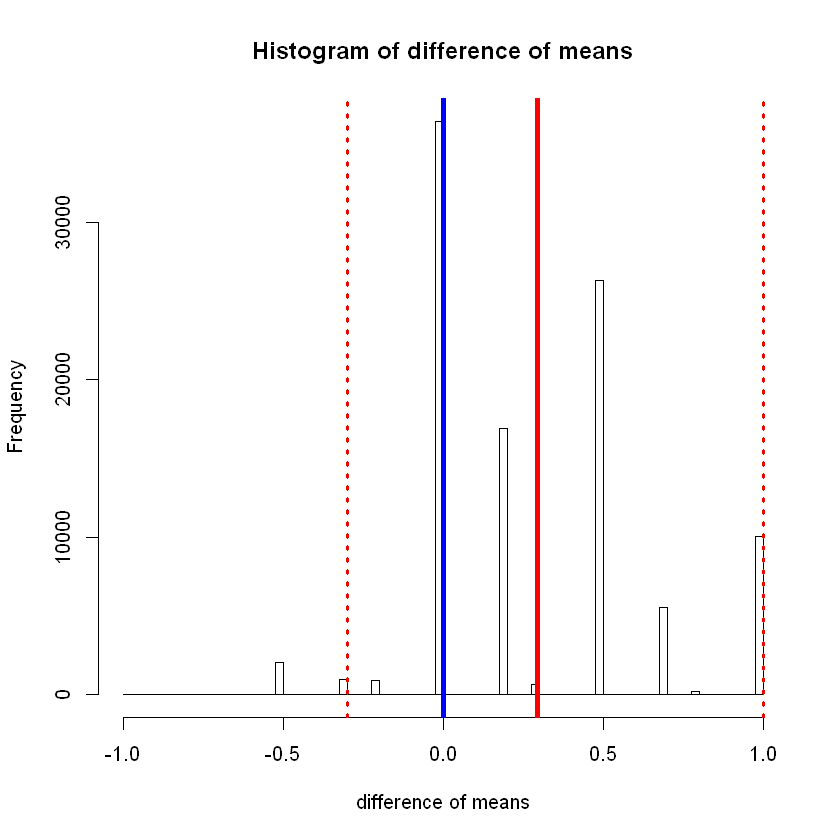

In [6]:
## Bootstrap the difference in medians of sons and fathers
two.boot.median = two.boot(male$childHeight, male$father, median, R = 100000)
plot.diff(two.boot.median$t)

The chart shows that the bootstrap distribution of the difference in medians. The confidence interval overlaps zero, so we must accept the null hypothesis that the difference in medians is zero.

You can also plot the Q-Q Normal plot of the bootstrap distribution of the difference in medians. Run the code in the cell below and examine the result.

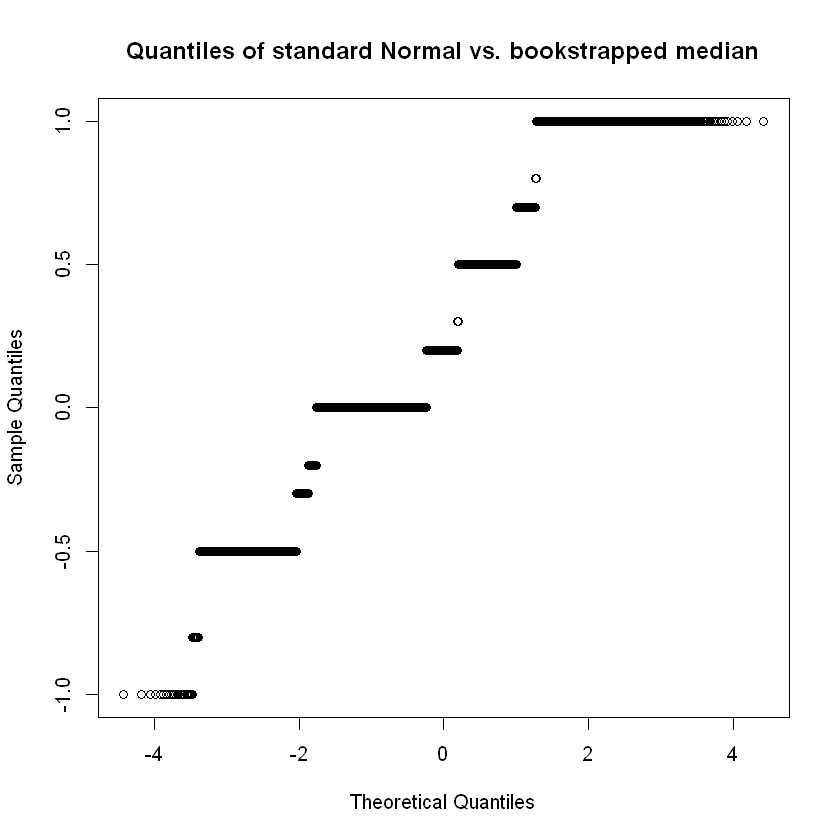

In [7]:
## Is the bootstrapped distribution Normal?
qqnorm(two.boot.median$t, main = 'Quantiles of standard Normal vs. bookstrapped median')

Keep in mind that the CLT only applies to sample means, not medians or any other statistic. None the less, you can see that the Q-Q Normal plot of the bootstrap distribution of the difference in meadians tends down the center diagonal of the plot. The zig-zag behavior arrises from the quanitzation inherent in the median.

## The Jack Knife

The jack knife is another resampline method. The jack knife is related to the bootstrap, but is a bit more restrictive in its applicaiton. Spcifically, the jack knife:

- Re-computes a statistic many times with sample with replacement.
- Uses Random leave one (or n) out sampling.
- Only works for statistics with continuous derivatives.

For example, you can compute the bootstrap mean as:

$$MeanJK = \frac{\Sigma_i mean(sample_i)}{nsample}\\
where,\ for\ example\ with\ 10\ samples,\\
sample_i = X_1 + X_2 + X_3 + X_4 + X_5 + X_6 + X_8 + X_9 + X_{10}$$

A simple example of using a jack knife estimation of a mean is shown in the cell below. Run this code, examine the results and compare them to those obtainted with the bootstrap. 

In [8]:
## Jackknife the mean of the sons and of daughters
mean.jack.male = jackknife(male$childHeight, mean)
mean.jack.male$stats
mean.jack.female = jackknife(female$childHeight, mean)
mean.jack.female$stats

,Observed,SE,Mean,Bias
mean,69.2341,0.1196398,69.2341,0


,Observed,SE,Mean,Bias
mean,64.10397,0.1106782,64.10397,-6.423306e-12


#### Copyright 2017, Stephen F Elston. All rights reserved.